# Análise Estatística do Texto do Plano de Governo do MDB para 2022

In [ ]:
#!pip install pdfplumber -q

In [34]:
# importar bibliotecas
import pdfplumber
import re
from collections import Counter
import nltk
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
stopwords

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [36]:
stowordAdcionais = ['https', 'http', 'br', '2022', '2026',"'"]

In [ ]:
def menu():
    print('''1 - CIRO FERREIRA GOMES)
             2 - JOSE MARIA EYMAEL
             3 - LUIZ FELIPE CHAVES D'AVILA
             4 - JAIR MESSIAS BOLSONARO
             5 - LEONARDO PÉRICLES VIEIRA ROQUE
             6 - LUIZ INÁCIO LULA DA SILVA
             7 - PABLO HENRIQUE COSTA MARÇAL
             8 - KELMON LUIS DA SILVA SOUZA
             9 - ROBERTO JEFFERSON MONTEIRO FRANCISCO
             10 - SIMONE NASSAR TEBET
             11 - SOFIA PADUA MANZANO
             12 - SORAYA VIEIRA THRONICKE
             13 - VERA LUCIA PEREIRA DA SILVA SALGADO'''



In [37]:
stopwords.extend(stowordAdcionais)

In [38]:
pdf=pdfplumber.open('ciro_gomes.pdf')

In [39]:
len(ciro_gomes.pages)

26

In [40]:
print(pdf.pages[5].extract_text())

PROGRAMA  DE  GOVERNO  DE  CIRO  GOMES  2  O 2  2 
Crescer  mais e 
gerar  mais empregos 
■ 
O Projeto  Nacional  de  Desenvolvimento  parte  do  princípio  que  é essencial  retomar  o 
crescimento  de forma economicamente  sustentável,  o que significa  gerar empregos  e 
garantir  a estabilidade  de preços.  Para isso, prevê um pacto  entre  os setores  público  e 
privado  em torno  de metas  para o crescimento  econômico  e os objetivos  de desenvolvi 
mento  sustentável  definidos  pela ONU. 
Devemos  ter  um Estado  inteligente,  dotado  de ferramentas  tecnológicas  de gestão  e 
acompanhamento  da execução  de políticas  públicas. 
Em um  primeiro  momento,  a  retomada  das  obras  de  infraestrutura  logística  e social, 
incluindo as atualmente  paradas, será essencial  para recuperamos  o crescimento  perdido 
nas últimas  décadas  e estimularmos  o setor privado a voltar a investir fortemente  no país. 
Ao mesmo  tempo,  o setor  público deverá  recuperar  a sua capacidad

O primeiro passo é juntar todo o conteúdo.

In [41]:
type(ciro_gomes)

pdfplumber.pdf.PDF

In [42]:
conteudo=''
for item in pdf.pages:
  conteudo=conteudo+item.extract_text()

conteudo



'PDT \nLINHASG ERAIDS O \n\'  " \nDOP  DTIA   PRESIDENCIA \n, \nDAR  EPUBLICEAM 2  022. PDT \nAqui, apresentamos  as principais  diretrizes \ndo  Projeto  Nacional  de  Desenvolvimento \nque Ciro Gomes está apresentando  à socie \ndade  brasileira.  A  partir  dessa  consulta, \nserá  elaborado  o  programa  de  governo \ndefinitivo  com o qual Ciro pretende  escrever \numa nova história  para o Brasil. \nPrefir \niro12 \nPRESIDENTE PROGRAMA  DE  GOVERNO  DE  CIRO  GOMES  2  O 2  2 \nO Brasilp  arou \nde  crescer \nO Brasil vive um dos momentos  mais graves de sua história. Além das ameaças  constantes \nà sua democracia,  o país convive há mais de uma década  com uma economia  absoluta \nmente estagnada  que está fazendo com que a fome e a miséria voltem a ser um problema \ncrônico - isso no país que é o segundo maior produtor de alimentos  do mundo. \nHoje, mais  de  31 milhões  de  brasileiros  passam  fome;  125 milhões  não  fazem  as três \nrefeições  diárias;  104 milhões  vivem

Pipeline: lower case, retirar pontuacao, tokenize, retirar stopwords

In [43]:
# lowercase
conteudo = conteudo.lower()

In [44]:
# retirar pontuacao
conteudo = re.sub(r'[^\w\s]',' ', conteudo)

In [45]:
# tokenizar
conteudo = re.findall(r'\w+',conteudo)

In [46]:
conteudo_limpo=[]
for item in conteudo:
  if (item not in stopwords) & (len(item)>1):
    conteudo_limpo.append(item)
conteudo_limpo

['pdt',
 'linhasg',
 'eraids',
 'dop',
 'dtia',
 'presidencia',
 'dar',
 'epubliceam',
 '022',
 'pdt',
 'aqui',
 'apresentamos',
 'principais',
 'diretrizes',
 'projeto',
 'nacional',
 'desenvolvimento',
 'ciro',
 'gomes',
 'apresentando',
 'socie',
 'dade',
 'brasileira',
 'partir',
 'dessa',
 'consulta',
 'elaborado',
 'programa',
 'governo',
 'definitivo',
 'ciro',
 'pretende',
 'escrever',
 'nova',
 'história',
 'brasil',
 'prefir',
 'iro12',
 'presidente',
 'programa',
 'governo',
 'ciro',
 'gomes',
 'brasilp',
 'arou',
 'crescer',
 'brasil',
 'vive',
 'momentos',
 'graves',
 'história',
 'além',
 'ameaças',
 'constantes',
 'democracia',
 'país',
 'convive',
 'década',
 'economia',
 'absoluta',
 'mente',
 'estagnada',
 'fazendo',
 'fome',
 'miséria',
 'voltem',
 'problema',
 'crônico',
 'país',
 'segundo',
 'maior',
 'produtor',
 'alimentos',
 'mundo',
 'hoje',
 '31',
 'milhões',
 'brasileiros',
 'passam',
 'fome',
 '125',
 'milhões',
 'fazem',
 'três',
 'refeições',
 'diárias',
 

In [47]:
conteudo_limpo=Counter(conteudo_limpo)
conteudo_limpo=conteudo_limpo.most_common(30)

In [48]:
import pandas as pd

df= pd.DataFrame(conteudo_limpo, columns=['Palavra','Quantidade'])
df

,Palavra,Quantidade
0,governo,42
1,programa,41
2,ciro,30
3,gomes,28
4,país,25
5,desenvolvimento,20
6,nacional,18
7,pública,17
8,deverá,17
9,população,17


In [49]:
import plotly.express as px
fig = px.bar(df, x='Palavra', y='Quantidade')
fig.show()

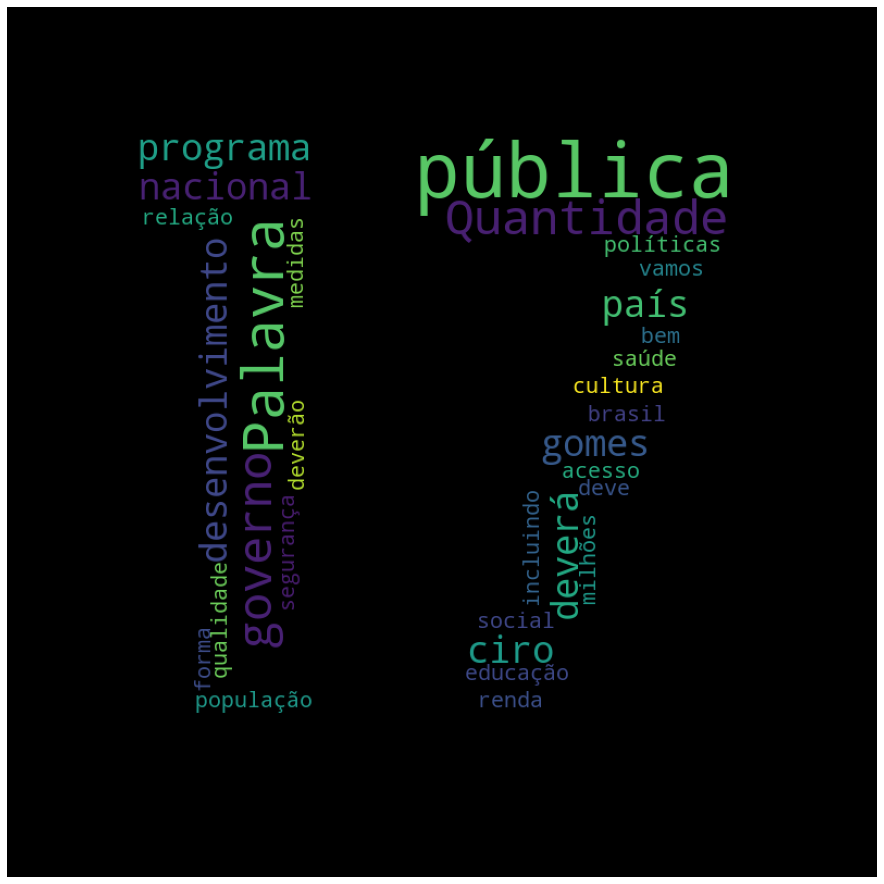

In [51]:
#criar wordcloud com formato de numero 13 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mask = np.array(Image.open('17.png'))

wordcloud = WordCloud(background_color='black', mask=mask,stopwords=stopwords, max_words=100, max_font_size=100, random_state=42)
wordcloud.generate(str(df))

plt.figure(figsize=(20,16))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()









In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color='black',stopwords=stopwords, max_words=100, max_font_size=100, random_state=42)
wordcloud.generate(str(conteudo_limpo))

plt.figure(figsize=(20,16))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
